# Kapitza's Pendulum

By Conor Floyd, Antonia Hekster, and Zoe Worrall

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, ConnectionPatch
from p24asolver import P24ASolver

ModuleNotFoundError: No module named 'p24asolver'

In [2]:
MASS_RADIUS = 0.2 #the radius of the mass in the drawing
DRIVER_RADIUS = 0.1 #the radius of the driver in the drawing
ANIMATE_360 = False #true = driver at center of animation; false = driver at bottom of animation
DRAW_TRAIL = True #should the animations draw the trail of the mass as it moves?

## Kapitza's Pendulum

In this investigation we explored "Kapitza's Pendulum", a single pendulum whose top is vibrated vertically. We neglected friction and air resistance to allow us to use the Lagrangian to solve for angular acceleration in terms of angle.

Kapitza's Pendulum is much like a normal pendulum, using a fixed rod where a string might go. we are assuming the rod to be of negligable mass and perfectly rigid, which allows the pendulum to assume an inverted configuration. Ultimately, we are investigating a single pendulum whose top is vibrated vertically by $X = A \sin(\omega t)$, where $A$ and $\omega$ are parameters you can vary. For certain values of the parameters, you can stabilize the pendulum in the upside down orientation!

We know that the equation of motion of the pendulum must follow Langrangian expansion, where

$$ \frac {∂L} {∂q} = \frac {d} {dt} (\frac {∂L} {∂\dot{q}}) $$

<img src='Figures/pendulumDrawing.jpg'>

To start with , we know that the position of the mass should depend on both the oscillator and on the its placement in it's oscillation. Thus, for placement r of the mass,

$$ \vec{r} = (l sinθ) \hat{x} + (A sin(ωt) + l cosθ) \hat{y} $$

Notice that in this simulation, the mass will experience a brief downward force, and then experience a brief upwards force. This is what allows the pendulum to stay up in the air; the force is restoring $\dot{y}$, or the velocity in the y direction of the oscillator, as the pendulum moves across the screen. Resultantly, the relative speed of the pendulum should be cancelled out as the oscillator moves.

We have the equation 
$$ \vec{r} = (l sinθ) \hat{x} + (A sin(ωt) + l cosθ) \hat{y} $$
which we can derive to find that
$$ \dot{\vec{r}} = (l \dot{θ} cosθ) \hat{x} + (A ω cos(ωt) - l \dot{θ} cosθ) \hat{y} $$

To solve using Lagrangian, we need to find Lagrangian first. We know

$$ L = K - U $$

So let's find K and U first.
For K, 
\begin{align}
  K &= \frac 1 2 m v^2 \\
  K &= \frac 1 2 m ((l \dot{θ} cosθ) \hat{x} + (A ω cos(ωt) - l \dot{θ} cosθ) \hat{y})^2 \\
  K &= \frac 1 2 m ((l \dot{θ} cosθ)^2 + (A ω cos(ωt) - l \dot{θ} cosθ)^2) \\
  K &= \frac 1 2 m (l^2 \dot{θ}^2 + A^2 ω^2 cos^2(ωt) - 2Alω\dot{θ} cos(ωt)sinθ)
\end{align}

And for U,
\begin{align}
  U &= m g (A sin(ωt) + l cosθ)
\end{align}

Finally, we can combine both of these equations and get
$$ L = \frac 1 2 m (l^2 \dot{θ}^2 + A^2 ω^2 cos^2(ωt) - 2Alω\dot{θ} cos(ωt)sinθ) - m g (A sin(ωt) + l cosθ) $$

Then, let's find $\frac {∂L} {∂q}$.

$$ \frac {∂L} {∂q} = mgl sinθ - mAωl\dot{θ}cosθcos(ωt) $$

And now, let's find $\frac d {dt} (\frac {∂L} {∂\dot{q}})$.

$$ \frac d {dt} (\frac {∂L} {∂\dot{q}}) = \frac d {dt} (ml^2\dot{θ} - mAωl\dot{θ}sinθcos(ωt)) $$

$$ \frac d {dt} (\frac {∂L} {∂\dot{q}}) = ml^2\ddot{θ} - mAω^2lsinθsin(ωt) - mAωl\dot{θ}cosθcos(ωt) $$

With this, we can now use the Lagrangian expression $ \frac {∂L} {∂q} = \frac {d} {dt} (\frac {∂L} {∂\dot{q}}) $ to find the angular frequency of the mass.

\begin{align}
  \frac {∂L} {∂q} &= \frac {d} {dt} (\frac {∂L} {∂\dot{q}}) \\
  mgl sinθ - mAωl\dot{θ}cosθcos(ωt) &= ml^2\ddot{θ} - mAω^2lsinθsin(ωt) - mAωl\dot{θ}cosθcos(ωt) \\
\end{align}
  
$ mAωl\dot{θ}cosθcos(ωt) = ml^2\ddot{θ} $ cancels on both sides, and so we see that

\begin{align}
  mgl sinθ &= ml^2\ddot{θ} - mAω^2lsinθsin(ωt)) \\
  l \ddot{θ} + (g-Aω^2sin(ωt))sinθ &= 0 \\
\end{align}

Using small angle approximation, however, see that 

$$ l \ddot{θ} + (g-Aω^2sin(ωt)) θ = 0 $$

And so, we see that we have angular frequency ωₛ of

$$ ωₛ = \sqrt{\frac {g-Aω^2sin(ωt)} l} $$

Resultantly, in our code we 


To simulate our code, we used variables 'theta' (representing θ) and 'thetaD' (representing $\dot{θ}$). We put these two variables into the derivatives class, using theta to calculate the acceleration, and then returned both 'thetaD' and 'thetaDD' (representing $\ddot{θ}$) as a tuple.

In [3]:
class InvPend(P24ASolver): # Simulates a vertically driven pendulum using the P24ASolver class
    
    def __init__(self, **kwargs): #Initializes the InvPend object with given values or defaults
        super().__init__( ( ('theta', '$theta$'), ('thetaD', r'$\dot{theta}_1$') ) )
        self.theta = kwargs.get('theta', 0) #angle of mass to vertical, defaults to 0
        self.thetaD = kwargs.get('thetaD', 0) #angular velocity of mass, defaults to 0
        self.thetaDD = kwargs.get('thetaDD', 0.0) #angular acceleration of mass, defaults to 0
        self.w = kwargs.get('omega', 100.0) #angular frequency of drive, defaults to 1
        self.A = kwargs.get('A', 1) #amplitude of drive, defaults to 1
        self.m = kwargs.get('m', 5.0) #mass of mass, defaults to 5
        self.l = kwargs.get('l', 10.0) #length of pendulum rod, defaults to 10
        self.g = kwargs.get('g', 9.81) #downwards accelertaion due to gravity, positive.
        #legacy variables:
        self.rtol = kwargs.get('rtol', 1e-10)
        self.atol = kwargs.get('atol', 1e-10)
    
    def derivatives(self, t, list_Values): #calculates angular acceleration from theta.
        theta, thetaD = list_Values  # unpack the values
        thetaDD = (self.g-self.A*(self.w**2)*np.sin(self.w*t))*np.sin(theta)/(self.l)
        return [thetaD, thetaDD]
    
    def prepare_figure(self): #creates the figure and axes for animation
        fig, ax = plt.subplots(figsize=(6, 6))
        if ANIMATE_360: #overrides axes to properly center graph, prevents mass from leaving frame
            ax.set_xlim((-(self.l*1.1 + self.A), self.l*1.1 + 2*self.A))
            ax.set_ylim((-(self.l*1.1 + self.A), self.l*1.1 + 2*self.A))
        else: #legacy option showing only top half of pendulum system
            ax.set_xlim((-6, 6))
            ax.set_ylim((-1, 11))
            
        self.lines = [ax.plot([], [], 'k-')[0] for n in range(3)] #initializes lines displaying rod
        self.parts = [Circle((3, 10), radius=MASS_RADIUS, color='r')] #the pendulum
        self.parts.append(Circle((0, 0), radius=DRIVER_RADIUS, color='g')) #the driver
        
        for c in self.parts:
            ax.add_patch(c)
        return fig, ax

    def draw_frame(self, t): #draws the frame at time t
        theta, thetaD = self.solution.sol(t) #evaluates solution at time t
        x_d = 0 #calculates x-position of driver
        y_d = self.A*np.sin(self.w*t) #calculates y-position of driver
        x_m = x_d + self.l*np.sin(theta) #calculates x-position of mass
        y_m = y_d + self.l*np.cos(theta) #calculates y-position of mass
        
        #draws rod from driver to mass
        self.lines[0].set_data((x_d + DRIVER_RADIUS*np.sin(theta), x_m - MASS_RADIUS*np.sin(theta)),
                               (y_d + DRIVER_RADIUS*np.cos(theta), y_m - MASS_RADIUS*np.cos(theta)))
        self.parts[1].remove() #removes driver
        self.parts[0].remove() #removes mass
        self.parts = [] #resets parts list
        p = Circle((x_m, y_m), radius=0.2, color='r') #makes mass
        self._ax.add_patch(p) #adds mass to axes
        self.parts.append(p) #adds mass to parts
        c = Circle((x_d, y_d), radius=0.1, color='g') #makes driver
        self.parts.append(c) #adds driver to parts
        self._ax.add_patch(c) #adds driver to axes
        
        if DRAW_TRAIL: #draws trail of small dots following mass
            trail = Circle((x_m, y_m), radius=0.05, color='k') #makes trail dot
            self._ax.add_patch(trail) #adds trail dot to axes
            
        title = self._ax.set_title(f"t = {t:.2f}", usetex=False) #makes title
        return self.parts, self.lines, title

**FIRST TEST: Kapitza's Pendulum 1**

In this test, we see the pendulum in action. We've added dots demonstrating where the ball previously was in order to show the path that the mass was able to follow.

In [4]:
plt.rcParams.update({'font.family':'times'})

# variables for this test:
theta_0, thetaD_0 = 0.4, 0
tRange = (0, 10) # a tuple in the form (t_0, t_f)

# variables for plotting:
drawPlot = True
numPlottedFrames = 2001


#running the simulation:
Y0 = (theta_0, thetaD_0)
Kpend1 = InvPend(theta=theta_0)
Kpend1 = Kpend1.solve(Y0, tRange)

<IPython.core.display.Javascript object>


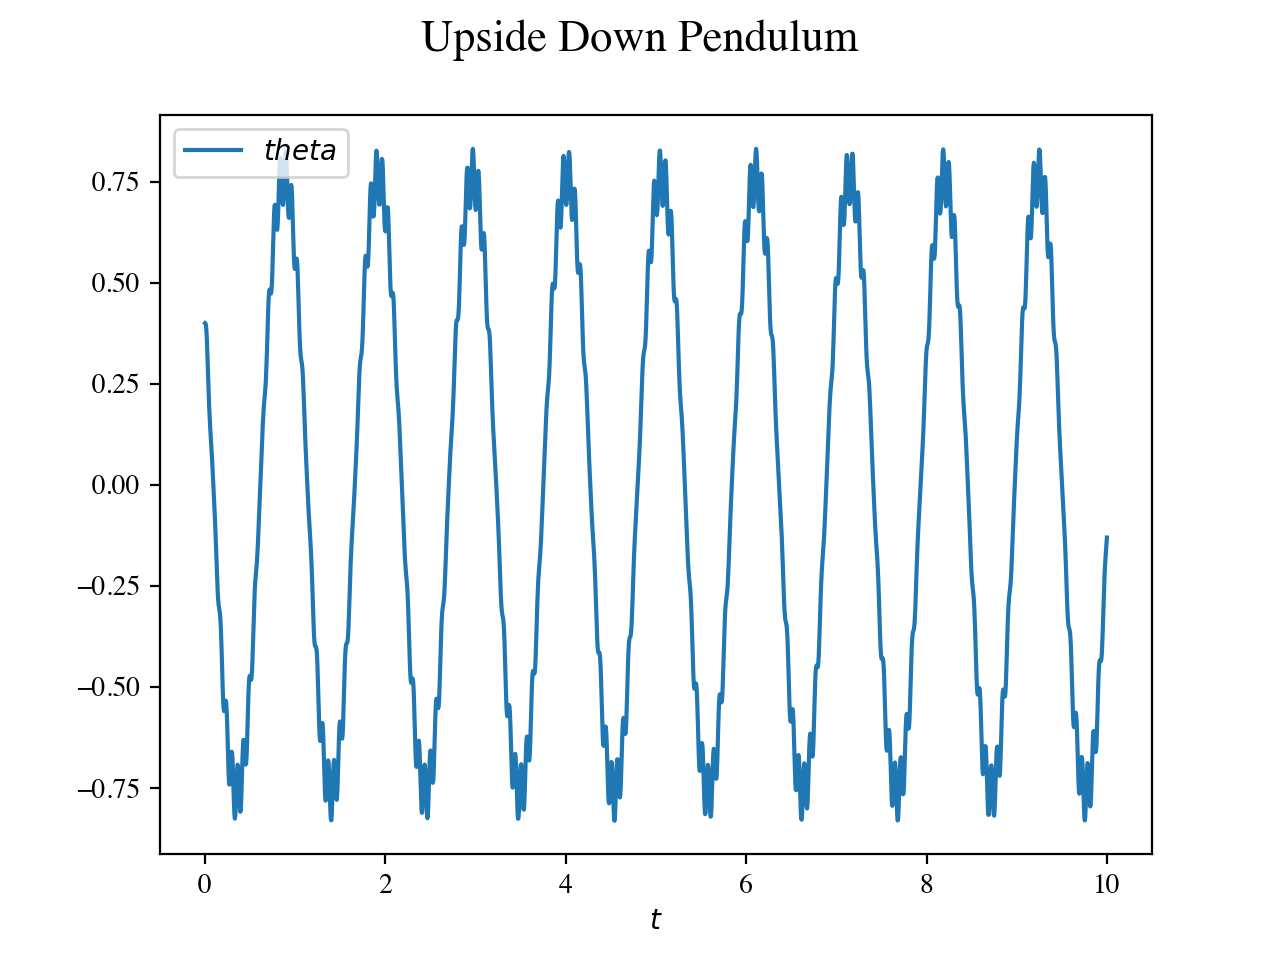

In [5]:
#making the plot:
if drawPlot:
    times1 = np.linspace(*tRange, numPlottedFrames)
    Kpend1 = Kpend1.plot(times1, ["theta"])
    plt.suptitle('Upside Down Pendulum', fontsize=16)
    plt.savefig('Figures/upsideDown.png', dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>


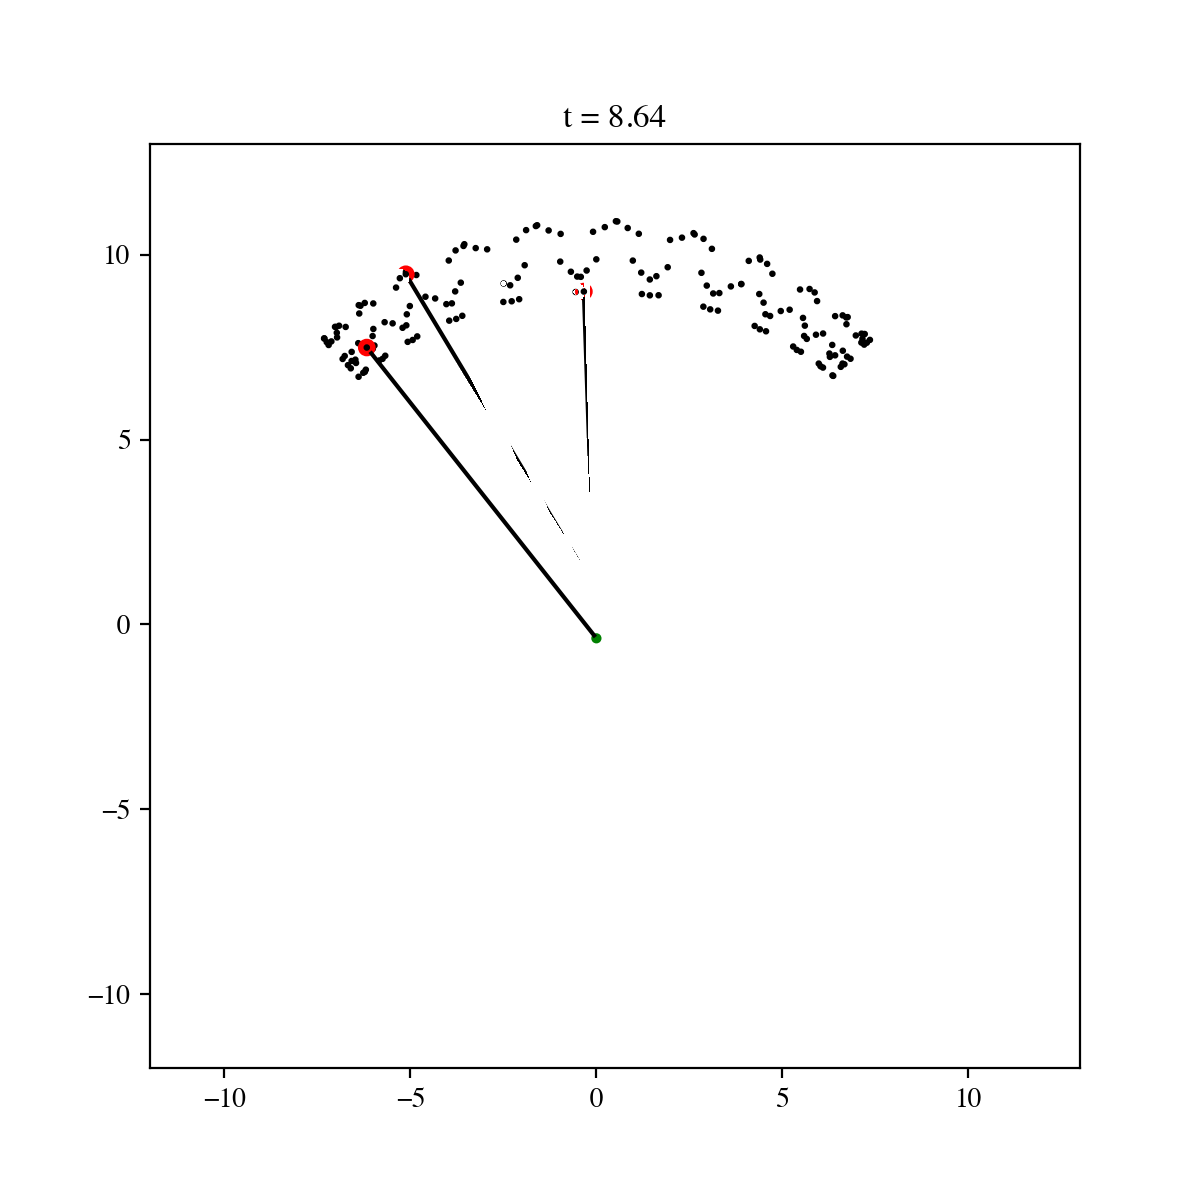

In [6]:
# ANIMATES OUR FIRST TEST
ANIMATE_360 = True
DRAW_TRAIL = True
anim = Kpend1.animate(200);

In [7]:
plt.close('all')

**SECOND TEST: Regular Pendulum**

To show that a non driven, normal pendulum will interact the right way (the simulation acts accurately as a pendulum), we programmed a non-driven pendulum to make sure everything is working as it should be.

In [8]:
# variables for this test:
theta_0, thetaD_0 = np.pi-0.4, 0
tRange = (0, 20)
w, A = 0, 0

# variables for plotting
drawPlot = True
numPlottedFrames = 200


#running the simulation:
Y0 = (theta_0, thetaD_0)
RegPend = InvPend(theta=theta_0, omega=w, A=A)
RegPend = RegPend.solve(Y0, tRange)

In [ ]:
#making the plot:
if drawPlot:
    times2 = np.linspace(*tRange, numPlottedFrames)
    RegPend = RegPend.plot(times2, ["theta"])
    plt.suptitle('Regular Pendulum', fontsize=16)
    plt.savefig('Figures/regPend.png', dpi=300, bbox_inches='tight')

<img src='Figures/regPend.png'>

<IPython.core.display.Javascript object>


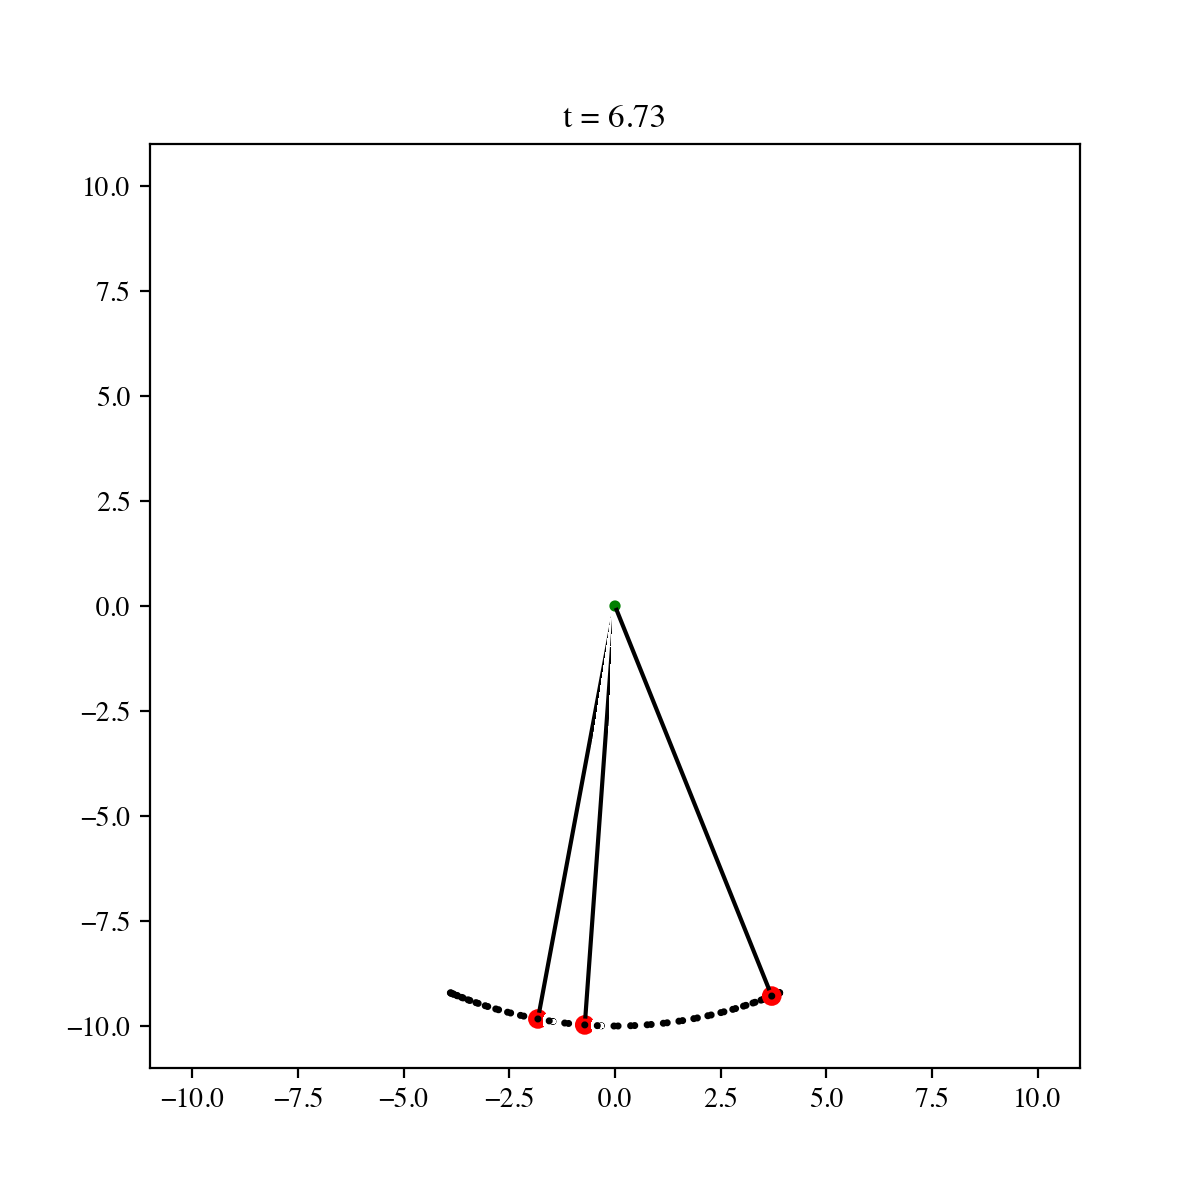

In [9]:
# ANIMATES OUR REGULAR PENDULUM TEST
ANIMATE_360 = True
DRAW_TRAIL = True
anim = RegPend.animate(200);

In [10]:
plt.close('all')

**THIRD TEST: Driven Regular Pendulum**

Now let's see what happens if we add a drive while the pendulum is hanging down.

In [11]:
# variables for this test:
theta_0, thetaD_0 = np.pi-0.4, 0
tRange = (0, 20)
w, A = 50, 0.5

# variables for plotting
drawPlot = True
numPlottedFrames = 200


#running the simulation with the above choices of starting variable
Y0 = (theta_0, thetaD_0)
DrivenRegularPendulum = InvPend(theta=theta_0, omega=w, A=A)
driven = DrivenRegularPendulum.solve(Y0, tRange)

In [ ]:
#making the plot
if drawPlot:
    times = np.linspace(*tRange, numPlottedFrames)
    DrivenRegularPendulum.plot(times, ["theta"])
    plt.suptitle('Driven Regular Pendulum', fontsize=16)
    plt.savefig('Figures/drivenReg.png', dpi=300, bbox_inches='tight')

<img src='Figures/drivenReg.png'>

<IPython.core.display.Javascript object>


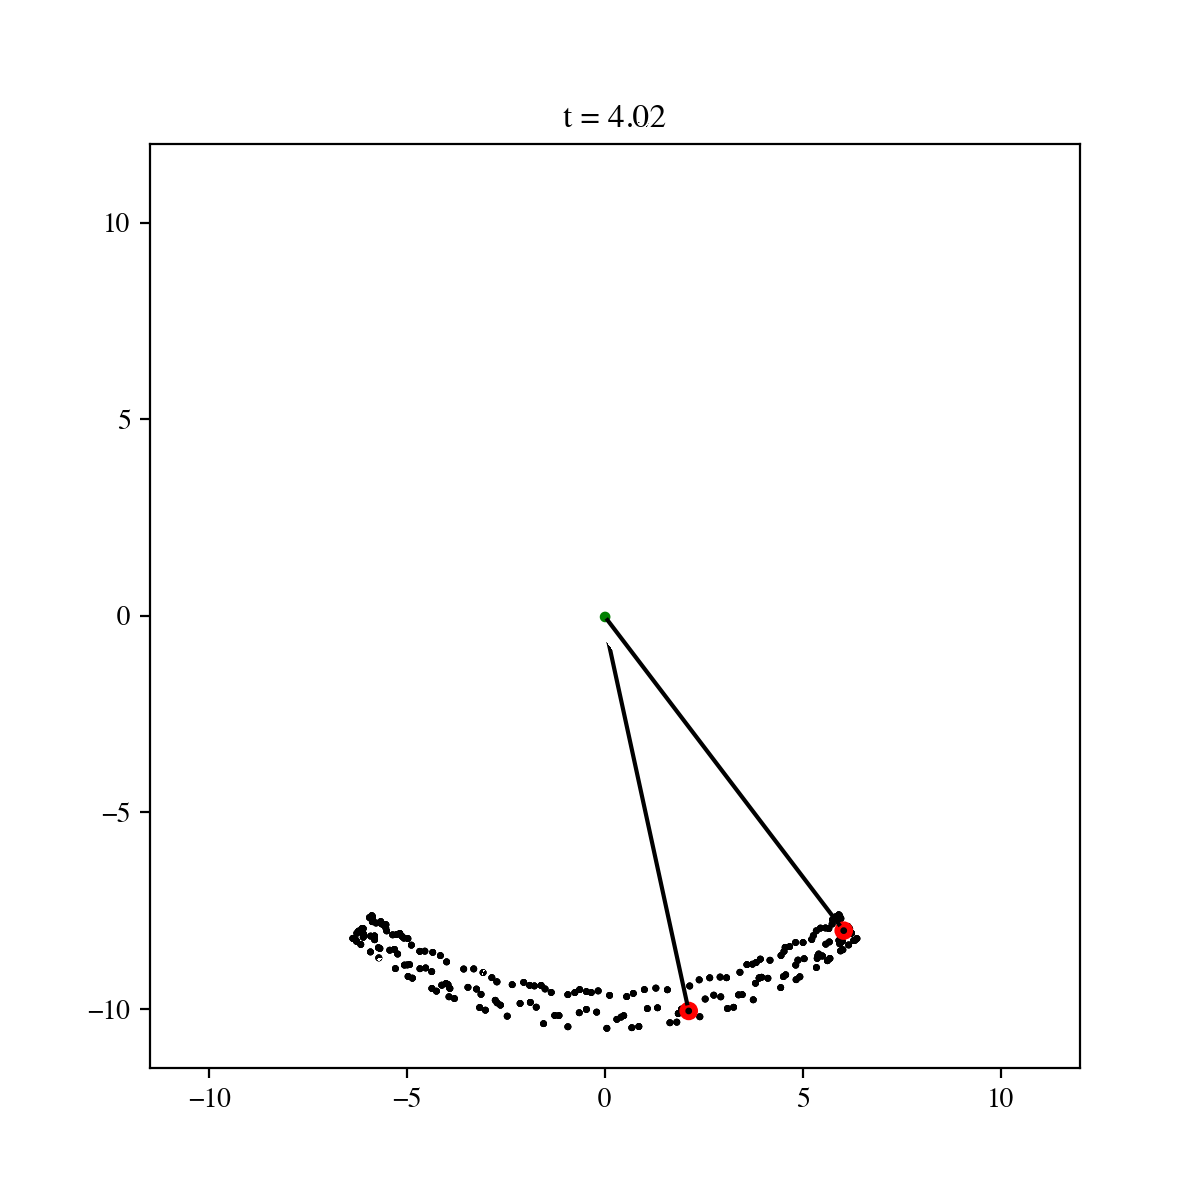

In [12]:
# ANIMATES OUR DRIVEN PENDULUM TEST
ANIMATE_360 = True
DRAW_TRAIL = True
anim = DrivenRegularPendulum.animate(200);

Notice that this is a higher frequency than the original! This is because the driving of the motor propels the mass toward equilibrium. What does this mean? Well, many things: take note of how the peaks differ.

In [ ]:
tvals = times

drive = DrivenRegularPendulum.solution
dtvals = drive.t

reg = RegPend.solution
rtvals = reg.t

fig, ax = plt.subplots()

ax.plot(dtvals, drive.y[0], label="driven")
ax.plot(rtvals, reg.y[0], label="regular")

ax.set_xlabel("$t$")
ax.set_ylabel("$theta$")
plt.suptitle('Compare Driven Regular and Regular Pendulum', fontsize=16)
plt.savefig('Figures/compareRegs.png', dpi=300, bbox_inches='tight')
ax.legend();

<img src='Figures/compareRegs.png'>

Now let's look at what happens when the pendulum start in the same place on the circle, except one is at the bottom of it and one is at the top.

In [ ]:
fig, ax = plt.subplots()
fig.suptitle('Opposing Starting Points', fontsize=16)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=1)

# going up:
theta_0, thetaD_0 = 0.4, 0
tRange = (0, 20)
w, A = 50, 0.5
Y0 = (theta_0, thetaD_0)

up = InvPend(theta=theta_0, omega=w, A=A).solve(Y0, tRange)
upSol = up.solution
ax.plot(upSol.t, upSol.y[0], label=A)
    
# going down:
theta_0, thetaD_0 = np.pi-0.4, 0
Y0 = (theta_0, thetaD_0)

down = InvPend(theta=theta_0, omega=w, A=A).solve(Y0, tRange)
downSol = down.solution
ax.plot(downSol.t, downSol.y[0], label=A)

# variables for plotting
drawPlot = True
numPlottedFrames = 200

ax.set_xlabel("$t$")
ax.set_ylabel("$theta$")
plt.savefig('Figures/oppositeStarts.png', dpi=300, bbox_inches='tight')
ax.legend();

<img src='Figures/oppositeStarts.png'>

Notice that the upwards driven pendulum has a smaller frequency; we figured this, similar to the driven regular pendulum, is because the pendulum is being forced towards the point of equilibrium faster than the driven, regular pendulum in order to keep it from falling down.

In [13]:
plt.close('all')

**FOURTH TEST: Driven Regular Pendulum**

Now let's look at what happens when we change amplitudes for different charts.

In [ ]:
fig, ax = plt.subplots()
fig.suptitle('Changing A and ω', fontsize=16)
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=1)

# original:
theta_0, thetaD_0 = 0.4, 0
tRange = (0, 20)
w, A = 50, 0.5
Y0 = (theta_0, thetaD_0)

orig = InvPend(theta=theta_0, omega=w, A=A).solve(Y0, tRange)
origSol = orig.solution
ax.plot(origSol.t, origSol.y[0], label=str('A = ' + str(A) + ', ω = ' + str(w)), color='black')
    
# increase A:
A = 0.7
Y0 = (theta_0, thetaD_0)

a_graph = InvPend(theta=theta_0, omega=w, A=A).solve(Y0, tRange)
aSol = a_graph.solution
ax.plot(aSol.t, aSol.y[0], label=str('A = ' + str(A) + ', ω = ' + str(w)), color='blue', alpha=0.4)

# increase w
w = 80
Y0 = (theta_0, thetaD_0)

w_graph = InvPend(theta=theta_0, omega=w, A=A).solve(Y0, tRange)
wSol = w_graph.solution
ax.plot(wSol.t, wSol.y[0], label=str('A = ' + str(A) + ', ω = ' + str(w)), color='red', alpha=0.4)

# variables for plotting
drawPlot = True
numPlottedFrames = 200

ax.set_xlabel("$t$")
ax.set_ylabel("$theta$")
plt.savefig('Figures/changingA&w.png', dpi=300, bbox_inches='tight')
ax.legend();

<img src='Figures/changingA&w.png'>

<IPython.core.display.Javascript object>


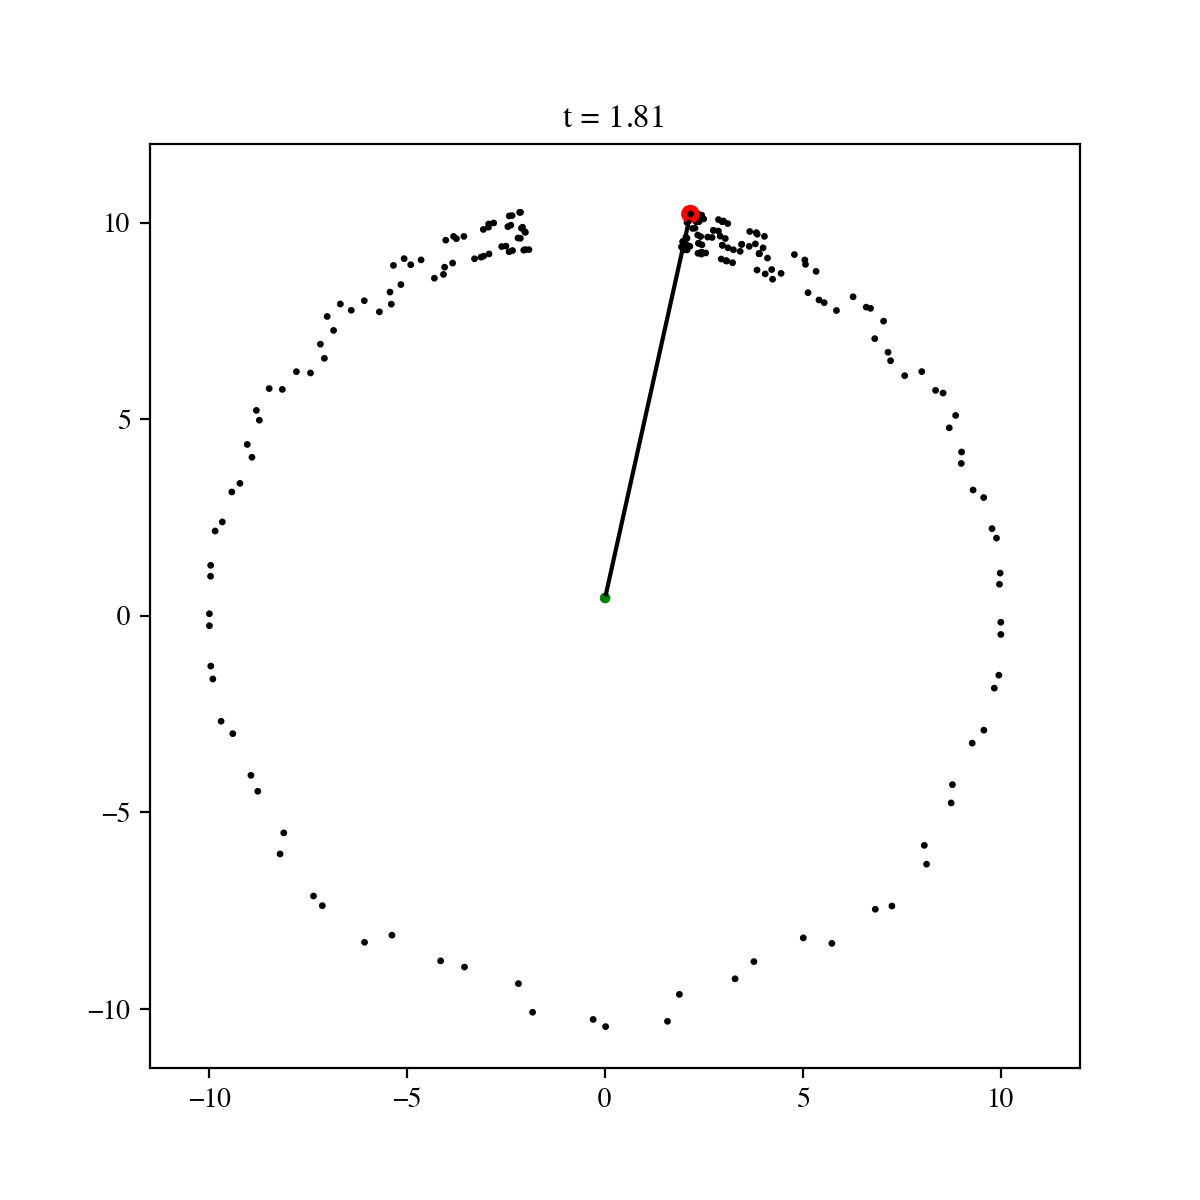

In [14]:
# Circular at 10

# variables for this test:
theta_0, thetaD_0 = 0.4, 0
tRange = (0, 20)
w, A = 15, 0.5

# variables for plotting
numPlottedFrames = 200

#running the simulation:
Y0 = (theta_0, thetaD_0)
CirclePend = InvPend(theta=theta_0, omega=w, A=A)
CirclePend = CirclePend.solve(Y0, tRange)
    
ANIMATE_360 = True
DRAW_TRAIL = True
anim = CirclePend.animate(200);

In [15]:
plt.close('all')

In [ ]:
simulation_length = 5
numSimulatedFrames = 200

min_w = 1
max_w = 50
numwtests = 40
min_A = 0
max_A = 2
numAtests = 40

def roundList(ls):
    lsNew = []
    removeBegError = ls[50:-1]
    for i in removeBegError:
        if i > 0.005 or i  < -0.005:
            lsNew.append(i)
        else:
            lsNew.append(0)
    return lsNew

theta_0, thetaD_0 = 0.4, 0

oscD = {} # the mass has gone up - it's a pendulum upwards
oscC = {} # the mass has began circling

wvals = np.linspace(min_w, max_w, num=numwtests)
Avals = np.linspace(min_A, max_A, num=numAtests)

#could increase efficiency of this drastically by edgefinding + not testing obviously good/bad values.
for w in wvals:
    for A in Avals:
        
        tRange = (0, simulation_length)
        Y0 = (theta_0, thetaD_0)
        
        #running simulation
        simulPend = InvPend(theta=theta_0, omega=w, A=A)
        simulPend.solve(Y0, tRange)

        times = np.linspace(*tRange, numSimulatedFrames)
        Y = simulPend.solution.sol(times)
        #print(Y[0])
        #print(w, A, min(Y[0]), max(Y[0]))
        oscD[(w, A)] = (max(Y[0]) < np.pi*3/4) and (min(Y[0]) > -np.pi*3/4)
        oscC[(w, A)] = roundList(Y[0]).__contains__(0)
        
x = []
y = []
c = []
for i in oscD:
    report = "w="
    x.append(i[0])
    report += str(i[0]) + ", A="
    y.append(i[1])
    report += str(i[1]) + ", c="
    if oscD[i]:
        c.append("green")
        report += "green"
    else:
        if oscC[i]:
            c.append("yellow")
            report += "yellow"
        else:
            c.append("red")
            report += "red"

        
#plot from oscD!
axes = plt.subplots()[1]
_ = axes.scatter(x, y, c=c)
plt.savefig('Figures/theBand.png', dpi=300, bbox_inches='tight')

<img src='Figures/theBand.png'>

## Analysis & More Testing

Now, we will look at the overall behavior of the pendulum under different conditions: One of the big things to understand here is the 5 discrete possibilities for a driven pendulum, which can all be observed by varying values of w and A. Even for a single (nontrivial) value of one parameter, we can vary the other to find all 5 distinct possibilites!

1) Stable equilibrium in the down position: 
- This is just like a normal pendulum, but with faster oscillations depending on $\omega$ and A.

2) Stable equilibrium in the up position:
- This is the famous Kapitza's Pendulum position!

3) Rotation around the pivot:
- Like what would happen if you threw a normal pendulum around its pivot so it did full circles around the pivot. 

4) Unstable equilibrium unique to Kapitza's Pendulum:
- This unstable equilibrium at $\theta\approx70^\circ$ is characteristic of Kapitza's pendulum. It is the point where in inwards force from the drive is equal to the the outwards force from gravity.

5) Unstable equilibrium in up position:
- This unstable equilibrium at $\theta=0^\circ$ is characteristic of the standard, non-driven pendulum, but is naturally possible with a vertically driven pendulum in the up position as well.

<img src='Figures/IMG_5344.jpg'>

In [ ]:
simulation_length = 5
numSimulatedFrames = 200

min_w = 0
max_w = 50
numwtests = 76
min_A = 0
max_A = 4
numAtests = 76

theta_0, thetaD_0 = 0.4, 0

oscD = {} # the mass has gone up - it's a pendulum upwards
oscC = {} # the mass has began circling

wvals = np.linspace(min_w, max_w, num=numwtests)
Avals = np.linspace(min_A, max_A, num=numAtests)

#could increase efficiency of this drastically by edgefinding + not testing obviously good/bad values.
for w in wvals:
    for A in Avals:
        
        tRange = (0, simulation_length)
        Y0 = (theta_0, thetaD_0)
        
        #running simulation
        simulPend = InvPend(theta=theta_0, omega=w, A=A)
        simulPend.solve(Y0, tRange)

        times = np.linspace(*tRange, numSimulatedFrames)
        Y = simulPend.solution.sol(times)
        #print(Y[0])
        #print(w, A, min(Y[0]), max(Y[0]))
        oscD[(w, A)] = (max(Y[0]) < np.pi*3/4) and (min(Y[0]) > -np.pi*3/4)
        
x = []
y = []
c = []
for i in oscD:
    report = "w="
    x.append(i[0])
    report += str(i[0]) + ", A="
    y.append(i[1])
    report += str(i[1]) + ", c="
    if oscD[i]:
        c.append("green")
        report += "green"
    else:
        c.append("red")
        report += "red"

#plot from oscD!
axes = plt.subplots()[1]
_ = axes.scatter(x, y, c=c)
plt.savefig('Figures/breakingDown.png', dpi=300, bbox_inches='tight')

<img src='Figures/breakingDown.png'>

# What does changing the ω and amplitude look like graphically?

In [ ]:
# Change Amplitude
ls, lstVals = [], []
theta_0, thetaD_0 = 0.4, 0
tRange = (0, 20)
w = 50
Y0 = (theta_0, thetaD_0)

fig, (ax1, ax2) = plt.subplots(2)
plt.plot()#b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=1, figure=(50,5))

#plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax1.set_title('Changing Amplitude at Fixed ω = 50', fontsize=16)

for A_0 in range(1,6):
    i = InvPend(theta=theta_0, omega=w, A=A_0/10).solve(Y0, tRange)
    iSol = i.solution
    ax1.plot(iSol.t, iSol.y[0], label='A = ' + str(A_0/10))

ax1.set_xlabel("$t$")
ax1.set_ylabel("$θ$")
ax1.grid(b=True, 
         color='grey', 
         alpha=0.2, 
         linestyle='-.', 
         linewidth=1) 
ax2.grid(b=True, 
         color='grey', 
         alpha=0.2, 
         linestyle='-.', 
         linewidth=1)
         #figure=(50,5))
ax1.legend();

# Change Omega
A = 1
Y0 = (theta_0, thetaD_0)

ax2.set_title('Changing ω at Fixed A = 1', fontsize=16)

for w_0 in range(1, 6):
    i = InvPend(theta=theta_0, omega=w_0*10, A=A).solve(Y0, tRange)
    iSol = i.solution
    ax2.plot(iSol.t, iSol.y[0], label='ω = ' + str(w_0*10))

ax2.set_xlabel("$t$")
ax2.set_ylabel("$θ$")
plt.savefig('Figures/changew&changeA.png', dpi=300, bbox_inches='tight')
ax2.legend();

<img src='Figures/changew&changeA.png'>

## To Notice
Notice that two of the ω values, where ω = 10 and ω = 20, continue decreasing overtime, whereas where ω = 30, 40, 50, the mass should be oscillating. Notice the following animation this is where ω = 10 and ω = 20.

<img src='Figures/breakingDown.png'>

## Elaboration

We wanted to figure out where the boundaries fall between an unstable oscillation and a stable one. We could see that, at A = 1, the band of instability would predict corresponding w to be around 23 and between 8 and 9. We decided to investigate this further by making various graphs around approximate values, resulting in the behaviour seen below.

In [ ]:
ls, lstVals = [], []
theta_0, thetaD_0 = 0.4, 0
tRange = (0, 20)
A = 1
Y0 = (theta_0, thetaD_0)

fig, ax = plt.subplots()
plt.grid(b=True, color='grey', alpha=0.2, linestyle='-.', linewidth=1)
fig.suptitle('Honing in on 23', fontsize=16)

for w_0 in range(1, 6):
    i = InvPend(theta=theta_0, omega=23.3317+w_0*0.00002, A=A).solve(Y0, tRange)
    iSol = i.solution
    ax.plot(iSol.t, iSol.y[0], label='ω = ' + str(23.3317+w_0*0.00002))

ax.set_xlabel("$t$")
ax.set_ylabel("$theta$")
plt.savefig('Figures/honingIn.png', dpi=300, bbox_inches='tight')
ax.legend();

<img src='Figures/honingIn.png'>

Let's see what the circle looks at close to 23.332!

In [17]:
# variables for this test:
theta_0, thetaD_0 = 0.4, 0
tRange = (0, 40)
w, A = 23.332, 1

# variables for plotting
drawPlot = True
numPlottedFrames = 2001

#running the simulation:
Y0 = (theta_0, thetaD_0)
SidewaysPend = InvPend(theta=theta_0, omega=w, A=A)
SidewaysPend = SidewaysPend.solve(Y0, tRange)

In [ ]:
#making the plot:
if drawPlot:
    times = np.linspace(*tRange, numPlottedFrames)
    Sideways_Pend = SidewaysPend.plot(times, ["theta"])
    plt.savefig('Figures/weird23.332.png', dpi=300, bbox_inches='tight')

<img src='Figures/weird23.332.png'>

<IPython.core.display.Javascript object>


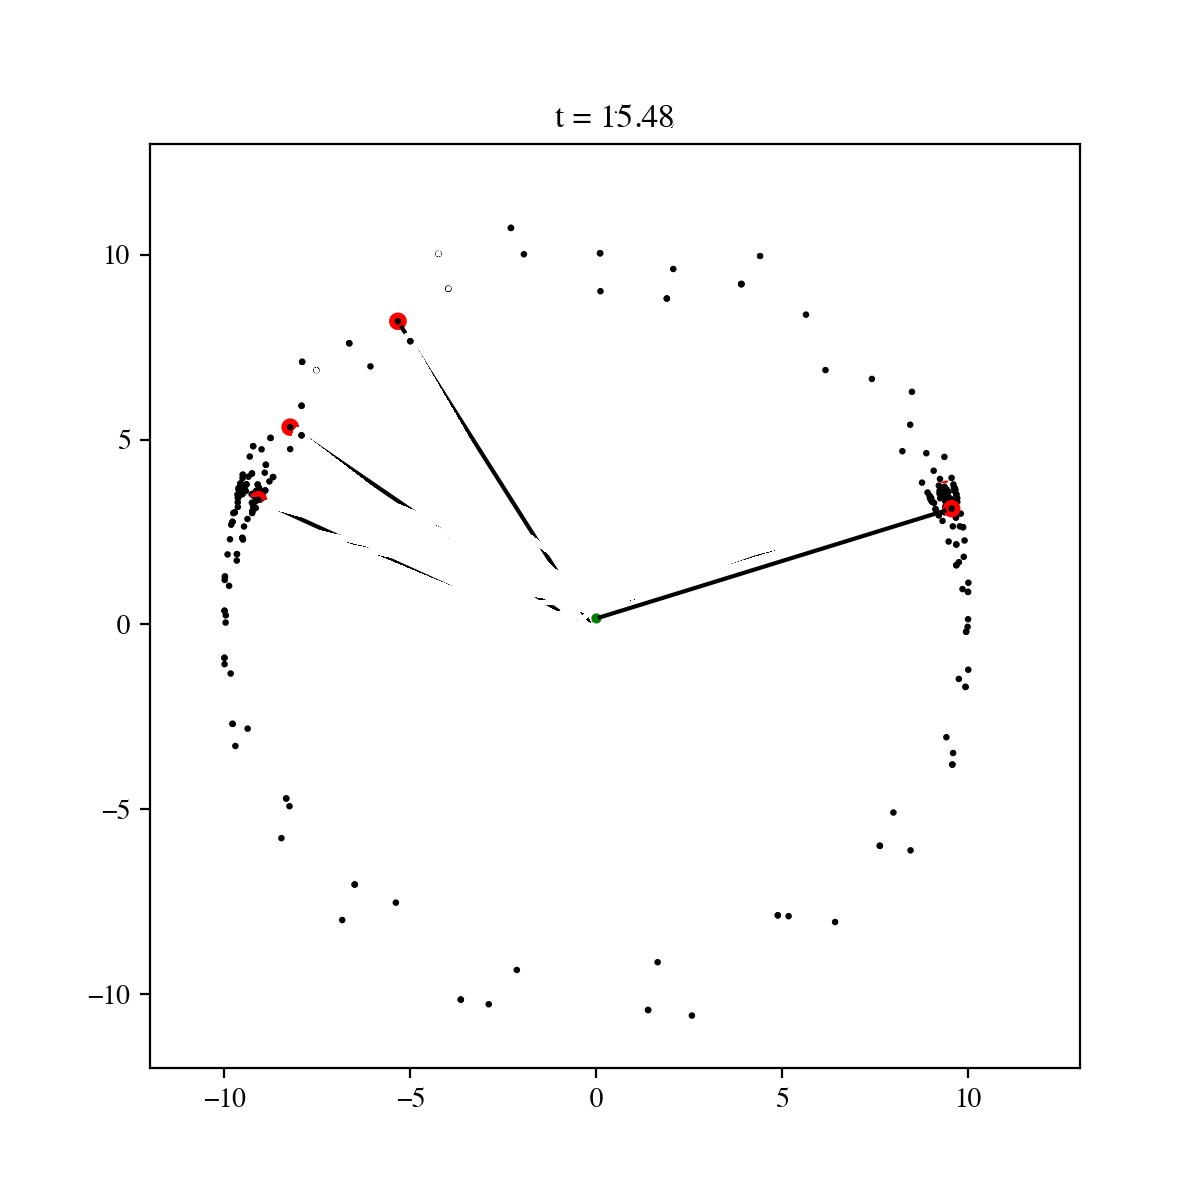

In [18]:
# ANIMATES OUR REGULAR PENDULUM TEST
ANIMATE_360 = True
DRAW_TRAIL = True
anim = SidewaysPend.animate(200);

In [19]:
plt.close('all')

**When Does What Happen?**

What's really going on here? Let's look at a graph that find whether the graph oscillates in a circle (red) or oscillates like a pendulum at the top of the circle (green).

Let's try a bunch of values of A and w for theta=0.4, and mark points as oscillating if they stay in the top 90 degrees for 5 seconds.

The yellow represents that the pendulum got stuck for a very short time at theta = 0. The green band represents that for the duration of the simulation, the band got stuck at 0.

# Challenges
One of our biggest challenges was taking the code we’ve been working with on Thursdays throughout the semester and applying it to our specific situation. While writing our Inverse Pendulum class and derivatives function for 24A Solver, we got stuck for a little while thinking about which variables needed to be included. However, since our equation of motion included theta and thetaDD, we figured out that we should start with theta and thetaD. Though, we usually start with thetaD_0 = 0 since we wanted to investigate omega. 

We also faced difficulties with our animations, specifically getting them to run at the right speed. You’ll see this later on, since our animation runs a little slower than real time. Also, 2/3 of the computers used for this project have been with us since middle school, meaning that they struggled to run even somewhat computationally intensive simulations within a reasonable timeframe. 

## Future Progress

- Analysis treating $\theta_0$ and $\dot{\theta}_0$ as parameters. in this we used $\theta_0 = 0.4 \text{ or } \pi-0.4$ but they are reasonable to change: you could imagine a 3d graph with theta_0 as an axis alongside w and A.

- Further analysis of characteristic Kapitza-unstable equilibrium by looking at different values of $\omega$ and A and finding the unstable equilibrium angle as those parameters change.

- Functions calculating the amplitude and frequency of the pendulum motion (the graphs of $\theta$ vs. t), allowing for more quantitative numerical analysis. In particular, finding experimentally the relationship between A, $\omega$, and the time period T of oscillation

- Analysis of circular / rotating-about-pivot case 
